In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
width, height = 28, 28

## Model 在keras中的意義

keras中, 建立整個計算圖(目前)分為sequential和model兩種, model類似於以往的graph, 在sequential中, 層間只有相鄰的關係, 跨層就沒有關係, 而model則是廣義的, 愛怎麼連就怎麼連, 只要inputs和outputs都是一個或一群tensor就可以。

In [3]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32  # 降到32
input_img = Input(shape=(width*height,)) # placeholder, input layer
encode_layer = Dense(encoding_dim, activation='relu')(input_img) # FC1
decode_layer = Dense(width*height, activation='sigmoid')(encode_layer) # FC2
autoencoder = Model(inputs=input_img, outputs=decode_layer) # model 1, 對應inputs and its reconstruction
encoder = Model(inputs=input_img, outputs=encode_layer) # model 2, 對應inputs and its encoded representation

encoded_input = Input(shape=(encoding_dim,)) # placeholder, input layer of encoder (dimension=encoding_dim)
decoder_layer = autoencoder.layers[-1] # decoder layer為最後一層
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input)) # model 3, decoder
autoencoder.compile(optimizer='Nadam', loss='binary_crossentropy')
#autoencoder.compile(optimizer='Nadam', loss='mean_squared_error')

In [4]:
train_X = pd.read_csv('Data/X_train.csv', header=None).values
train_t = pd.read_csv('Data/T_train.csv', header=None).values
test_X = pd.read_csv('Data/X_test.csv', header=None).values
test_t = pd.read_csv('Data/T_test.csv', header=None).values

In [5]:
# 並不直接去train encoder/decoder, 而是train autoencoder, 把其中的結果拿出來作為encoder/decoder
history = autoencoder.fit(train_X, train_X, epochs=50, batch_size=64,
                          shuffle=True, validation_data=(test_X, test_X))

Train on 5000 samples, validate on 2500 samples
Epoch 1/50
5000/5000 [==============================] - 0s - loss: 0.3131 - val_loss: 0.2381
Epoch 2/50
5000/5000 [==============================] - 0s - loss: 0.2016 - val_loss: 0.1858

dict_keys(['val_loss', 'loss'])


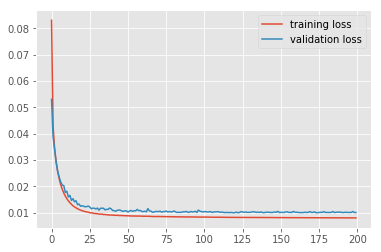

In [145]:
# MSE/Adam/NAdam在結果上差不多
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
# line1, = plt.plot(np.log(history.history['loss']))
# line2, = plt.plot(np.log(history.history['val_loss']))
line1, = plt.plot(history.history['loss'])
line2, = plt.plot(history.history['val_loss'])
plt.legend((line1, line2), ('training loss', 'validation loss'), loc='best')
plt.show()
plt.close()

In [6]:
# encode and decode some digits
encoded_imgs = encoder.predict(test_X)
decoded_imgs = decoder.predict(encoded_imgs)

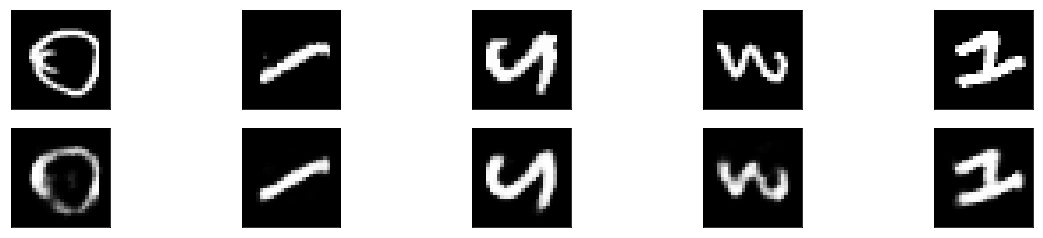

In [8]:
#畫一些圖看一下效果
import matplotlib.pyplot as plt

n = 5  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i*500].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i*500].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [149]:
X = pd.DataFrame(encoder.predict(train_X))
X.to_csv('X_train_encoded.csv', header=False, index=False)
X_test = pd.DataFrame(encoder.predict(test_X))
X_test.to_csv('X_test_encoded.csv', header=False, index=False)

以上做完後請至hw5_R繼續下一步

## for plot

### 1. adjust leaf size

In [172]:
plt.style.use('ggplot')
# leaf sizes
num_leaf_sizes = [int(i) for i in "1 100 200 300 400 500 600 700 800 900 1000 1100 1200 1400 1600 1800 2000".split()]
train_accs = [float(i) for i in "0.9992 0.9562 0.9406 0.9238 0.9126 0.898 0.8756 0.7978 0.782 0.6552 0.581 0.554 0.4686 0.4046 0.3958 0.3916 0.394".split()]
test_accs = [float(i) for i in "0.9644 0.9372 0.9272 0.9148 0.9024 0.8924 0.8708 0.79 0.7808 0.644 0.5788 0.5556 0.4776 0.4032 0.396 0.3924 0.396".split()]

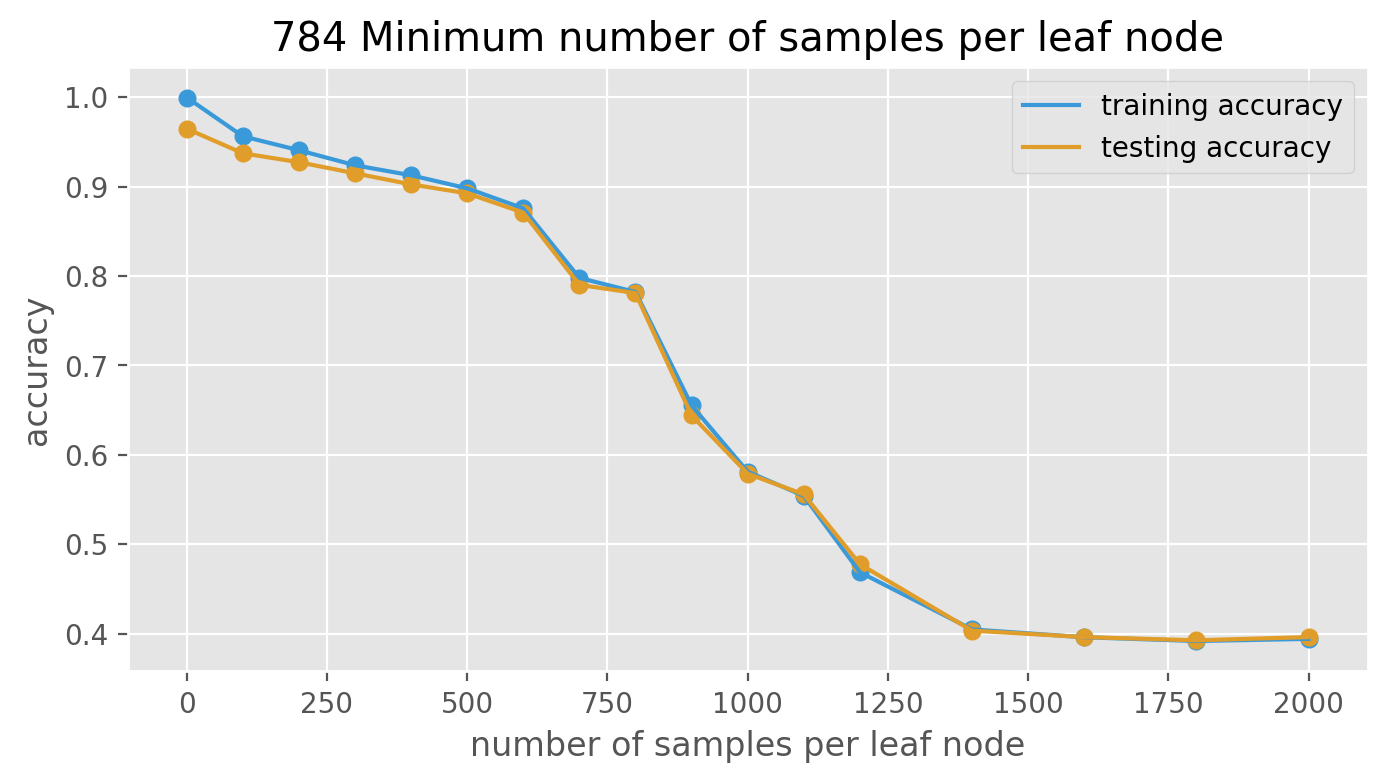

In [184]:
plt.figure(figsize=(8, 4), dpi=200)
line1, = plt.plot(num_leaf_sizes, train_accs, color="#3A9AD9", label='training accuracy')
plt.scatter(num_leaf_sizes, train_accs, color="#3A9AD9")
lines2, = plt.plot(num_leaf_sizes, test_accs, color="#E19D29", label='testing accuracy')
plt.scatter(num_leaf_sizes, test_accs, color="#E19D29")
plt.title("784 Minimum number of samples per leaf node")
plt.xlabel('number of samples per leaf node')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.savefig("784 Minimum number of samples per leaf node.png")
plt.show()

### 2. adjust number of trees

In [77]:
plt.style.use('ggplot')
# leaf sizes
num_trees = [int(i) for i in "1 10 20 30 40 50 60 70 80 90 100 200 300 400 500 600 700 800 900 1000".split()]
train_errs = [float(i) for i in "0.7706 0.9038 0.9154 0.9286 0.9286 0.9372 0.9404 0.9428 0.942 0.9356 0.9414 0.9426 0.9446 0.941 0.9442 0.9432 0.9416 0.9422 0.9444 0.942".split()]
test_errs = [float(i) for i in "0.7276 0.866 0.8832 0.8992 0.8976 0.9016 0.91 0.9048 0.9024 0.9072 0.902 0.9096 0.9092 0.9056 0.91 0.9092 0.9064 0.9088 0.9092 0.9116".split()]

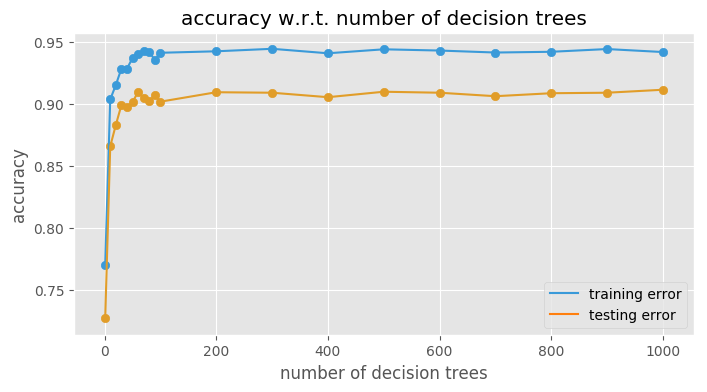

In [78]:
plt.figure(figsize=(8, 4), dpi=100)
line1, = plt.plot(num_trees, train_errs, color="#3A9AD9")
plt.scatter(num_trees, train_errs, color="#3A9AD9")
lines2, = plt.plot(num_trees, test_errs, color="#E19D29")
plt.scatter(num_trees, test_errs, color="#E19D29")
plt.title("accuracy w.r.t. number of decision trees")
plt.xlabel('number of decision trees')
plt.ylabel('accuracy')
plt.legend((line1, line2), ('training error', 'testing error'), loc='best')
plt.savefig("accuracy w.r.t. number of decision trees.png")
plt.show()

### 3. adjust fraction of sample

In [79]:
plt.style.use('ggplot')
fraction_samples = [float(i) for i in "0.02 0.04 0.06 0.08 0.1 0.2 0.3 0.4 0.5 0.6 0.8 1".split()]
train_accs = [float(i) for i in "0.5876 0.6494 0.789 0.8178 0.8448 0.8696 0.8916 0.8962 0.9186 0.921 0.935 0.9396".split()]
test_errs = [float(i) for i in "0.59 0.6388 0.7824 0.8148 0.8364 0.8568 0.8692 0.8744 0.8968 0.8956 0.9008 0.9064".split()]

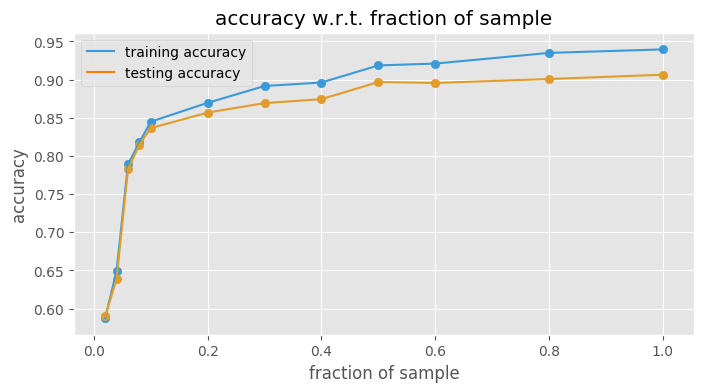

In [80]:
plt.figure(figsize=(8, 4), dpi=100)
line1, = plt.plot(fraction_samples, train_accs, color="#3A9AD9")
plt.scatter(fraction_samples, train_accs, color="#3A9AD9")
lines2, = plt.plot(fraction_samples, test_errs, color="#E19D29")
plt.scatter(fraction_samples, test_errs, color="#E19D29")
plt.title("accuracy w.r.t. fraction of sample")
plt.xlabel('fraction of sample')
plt.ylabel('accuracy')
plt.legend((line1, line2), ('training accuracy', 'testing accuracy'), loc='best')
plt.savefig("accuracy w.r.t. fraction of sample.png")
plt.show()